### Comparatif d'un neurones vs un reseaux a une couche vs un  reseaux a plusieurs couches

Creation de deux dataset de base l'un lineraire et l'autre non lineraire

In [174]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
plt.style.use('dark_background')

In [175]:
X_li,y_li = make_blobs(n_samples=2000,n_features=2,centers=2,random_state=0)
y_li.reshape((y_li.shape[0],1))
X_nl,y_nl = make_circles(n_samples=2000,noise=0.1,factor=0.3,random_state=0)
y_li.reshape((y_nl.shape[0],1))
print("X_li shape :",X_li.shape,'\n y_li shape :',y_li.shape,'\n X_nl shape :',X_nl.shape,'\n y_nl shape :',y_nl.shape)

X_li shape : (2000, 2) 
 y_li shape : (2000,) 
 X_nl shape : (2000, 2) 
 y_nl shape : (2000,)


<function matplotlib.pyplot.show(close=None, block=None)>

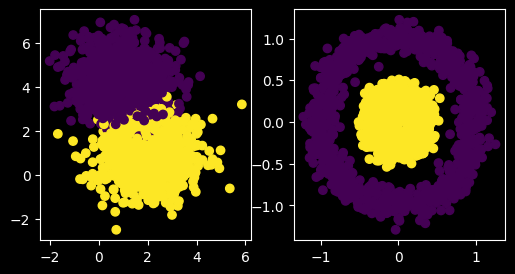

In [176]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_li[:,0],X_li[:,1],label = 'data set lineraire 0',c=y_li,cmap='viridis')
plt.subplot(1,2,2)
plt.scatter(X_nl[:,0],X_nl[:,1],label='data set non lineraire',c=y_nl,cmap='viridis')
plt.show

#### Reseaux a un neurone

In [177]:
import numpy as np
from numpy import random

In [178]:
#initilisation
def initialisation(X):
    W = random.randn(X.shape[1],1)
    b = random.randn(1)
    
    return W,b

In [179]:
#W_test,b_test = initialisation(X_li)
#print(W_test.shape)

In [180]:
#forward propagation
def froward_propagation(W,b,X):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A


In [181]:
#loss 
def log_loss(y,A):
    m = len(y)
    epsilon = 1e-15
    return (1 / m) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [188]:
# backward propagation
def backward_propagation(X,y,A,W,m):
    y = y.reshape(-1, 1)
    m = len(y)
    dW = (1/m)*X.T.dot(A-y)
    db  = (1/m)*np.sum(A-y)
    return dW,db

In [189]:
#update 
def update(W,b,dW,db,learning_rate):
    W = W -learning_rate*dW
    b = b -learning_rate*db
    return W,b

In [190]:
# fonction de prediction
def predict(X,W,b):
    A = froward_propagation(W,b,X)
    return A >= 0.5

In [200]:
print(max(X_li[:,0]),min(X_li[:,0]))
print(max(X_nl[:,0]),min(X_nl[:,0]))

5.856927736399993 -2.018342781681124
1.2496216757352168 -1.2220499841769095


In [209]:
# fonction pourtracer la frontier de decision du reseaux a un neurone 
def frontier_decision(X,W,b,y):
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]
    plt.figure(figsize=(12,6))
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.5)
    plt.show()


In [191]:
from tqdm import tqdm as tqdm

In [ ]:
# on vas faire le neurons maitenant 
def neurone(X,y,learning_rate,n_inter=1000):

    W,b = initialisation(X)
    Loss =[]
    acc = []

    for i in tqdm(range(n_inter)):
        A = froward_propagation(W,b,X)
        dW,db =backward_propagation(X,y,A,W,b)
        W,b = update(W,b,dW,db,learning_rate)
        y_pred = predict(X,W,b)
        Loss.append(log_loss(y,A))
        acc.append(accuracy_score(y.ravel(),y_pred.ravel()))


    y_pred = predict(X,W,b)
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(Loss)

    plt.subplot(1,3,2)
    plt.plot(acc)

    plt.subplot(1,3,3)
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.5)

    plt.show() 
    return(W,b)
        


100%|██████████| 1000/1000 [00:24<00:00, 40.51it/s]


[[0.91594288]
 [0.32506259]
 [0.95529019]
 ...
 [0.04232741]
 [0.2758039 ]
 [0.05918356]]
0.9345


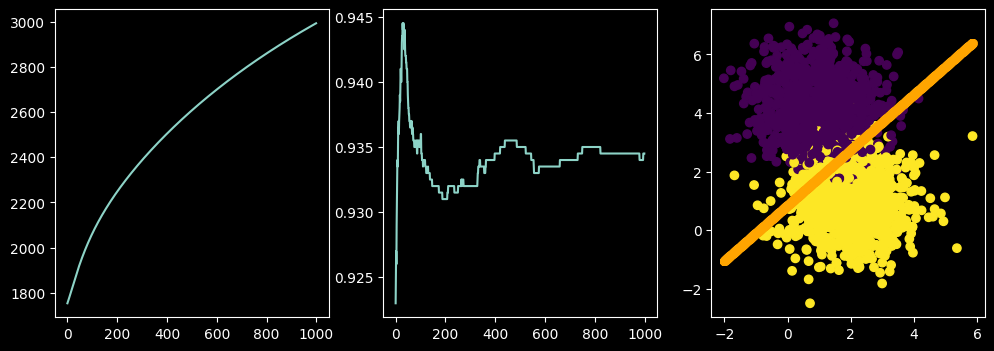

In [217]:
W,b = neurone(X_li,y_li,learning_rate=0.01,n_inter=1000)